In [1]:
suppressMessages(library(tidyverse))
options(warn=-1) # use options(warn=0) To turn warnings back on
options(dplyr.summarise.inform = FALSE)

In [2]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/Figures")

In [3]:
#load data
load("../data/data_SupFig04.RData")

In [4]:

res <- resid(mod <- lm(log(isoform_count) ~ log2(total_count+1), data = data))
res.qt <- quantile(res, probs = c(0.05,0.95))
out_below <- which(res < res.qt[1])
out_above <- which(res > res.qt[2])

data[c(out_below,out_above),] %>% nrow()


[1] 1498

pdf 
  2

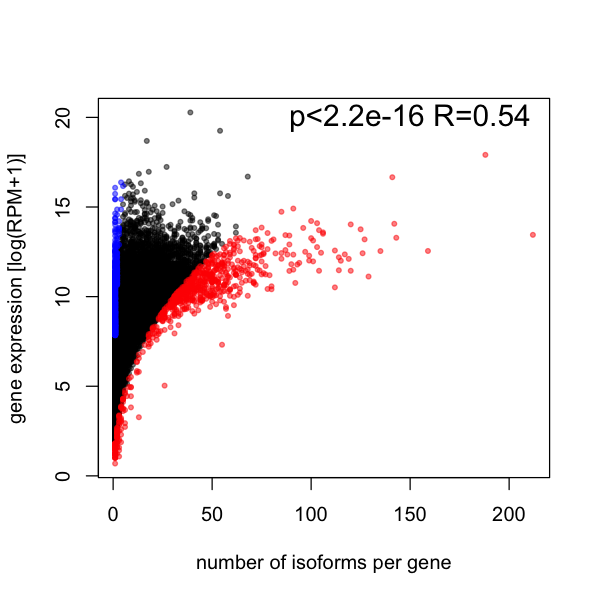

In [5]:
options(repr.plot.width=5, repr.plot.height=5)
test = cor.test(data[,"isoform_count"],data[,"total_count"])
plot(data, type = "n", xlab = "number of isoforms per gene", ylab = "gene expression [log(RPM+1)]",main="")
points(data[-c(out_below,out_above),"isoform_count"], data[-c(out_below,out_above),"total_count"], las = 1, col = alpha("black", 0.5), pch = 20, bg = "black", cex = 0.8);
points(data[out_below,"isoform_count"], data[out_below,"total_count"], las = 1, col = alpha("blue", 0.5), pch = 20, bg = "blue", cex = 0.8);
points(data[out_above,"isoform_count"], data[out_above,"total_count"], las = 1, col = alpha("red", 0.5), pch = 20, bg = "red", cex = 0.8);
text(x=150, y=20, cex = 1.5, col="black", paste0(ifelse(test$p.value == 0, paste0("p<2.2e-16"," R=",format(test$estimate, digit=2)),paste0("p=",format(test$p.value, digit=2),", R=",format(test$estimate, digit=2)))))

pdf("./FigS4.pdf", width=5, height=5)
test = cor.test(data[,"isoform_count"],data[,"total_count"])
plot(data, type = "n", xlab = "number of isoforms per gene", ylab = "gene expression [log(RPM+1)]",main="")
points(data[-c(out_below,out_above),"isoform_count"], data[-c(out_below,out_above),"total_count"], las = 1, col = alpha("black", 0.5), pch = 20, bg = "black", cex = 0.8);
points(data[out_below,"isoform_count"], data[out_below,"total_count"], las = 1, col = alpha("blue", 0.5), pch = 20, bg = "blue", cex = 0.8);
points(data[out_above,"isoform_count"], data[out_above,"total_count"], las = 1, col = alpha("red", 0.5), pch = 20, bg = "red", cex = 0.8);
text(x=150, y=20, cex = 1.5, col="black", paste0(ifelse(test$p.value == 0, paste0("p<2.2e-16"," R=",format(test$estimate, digit=2)),paste0("p=",format(test$p.value, digit=2),", R=",format(test$estimate, digit=2)))))
dev.off()